<a href="https://colab.research.google.com/github/afroman32/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Permutation%20and%20Boosting%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/afroman32/Unit-2-Build/master/movies.csv',
                     encoding = "ISO-8859-1")

In [0]:
print(movies.shape)
movies.head()

(6820, 15)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [0]:
movies['score'].describe()

count    6820.000000
mean        6.374897
std         1.003142
min         1.500000
25%         5.800000
50%         6.400000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [0]:
# director track record, movies success by director
# create new target based off of gross revenue and score
# make sure to train on features that would come before the target

In [0]:
movies['gross'].describe()

count    6.820000e+03
mean     3.349783e+07
std      5.819760e+07
min      7.000000e+01
25%      1.515839e+06
50%      1.213568e+07
75%      4.006534e+07
max      9.366622e+08
Name: gross, dtype: float64

In [0]:
gross_rate = []
for i in range(len(movies['gross'])):
  if movies['gross'][i]<=1.515839e+06:
    gross_rate.append(1)
  elif movies['gross'][i]<=1.213568e+07 and movies['gross'][i]>1.515839e+06:
    gross_rate.append(2)
  elif movies['gross'][i]<=4.006534e+07 and movies['gross'][i]>1.213568e+07:
    gross_rate.append(3)
  else:
    gross_rate.append(4)
gross_rate = np.array(gross_rate)

In [0]:
len(gross_rate)

6820

In [0]:
type(gross_rate)

numpy.ndarray

In [0]:
gross_rate[:10]

array([4, 4, 4, 4, 3, 4, 3, 2, 4, 4])

In [0]:
movies['gross'].head(10)

0     52287414.0
1     70136369.0
2    179800601.0
3     85160248.0
4     18564613.0
5    138530565.0
6     12729917.0
7      8551228.0
8     40471663.0
9     40456565.0
Name: gross, dtype: float64

In [0]:
 score_rate = np.array([])
for i in range(len(movies['score'])):
  if movies['score'][i]<=2.5:
    score_rate = np.append(score_rate, 1)
  elif movies['score'][i]<=5 and movies['gross'][i]>2.5:
    score_rate = np.append(score_rate, 2)
  elif movies['score'][i]<=7.5 and movies['gross'][i]>5:
    score_rate = np.append(score_rate, 3)
  else:
    score_rate = np.append(score_rate, 4)

In [0]:
len(score_rate)

6820

In [0]:
score_rate

array([4., 4., 3., ..., 3., 3., 3.])

In [0]:
movies['score'].head(10)

0    8.1
1    7.8
2    6.9
3    8.4
4    6.9
5    8.1
6    7.4
7    7.8
8    6.8
9    7.5
Name: score, dtype: float64

In [0]:
rate = (gross_rate + score_rate)/2
rate

array([4. , 4. , 3.5, ..., 2.5, 2. , 2. ])

In [0]:
movies['success_rate'] = rate
movies['success_rate'].value_counts(normalize = True)

2.5    0.247067
3.0    0.243255
2.0    0.229912
3.5    0.215982
4.0    0.039736
1.5    0.023021
1.0    0.001026
Name: success_rate, dtype: float64

In [0]:
movies['success_rate'].nunique()

7

#Train, Val, Test Split 
(60,20,20)

In [0]:
movies.sort_values(by = 'released', inplace = True)

In [0]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,success_rate
96,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986,2.5
195,0.0,Longshot,USA,Paul Bartel,Comedy,1096843.0,The Longshot,PG-13,1986-01-17,89,5.4,Tim Conway,457,Tim Conway,1986,2.0
47,1100000.0,Empire Pictures,USA,John Carl Buechler,Comedy,5450815.0,Troll,PG-13,1986-01-17,82,4.3,Michael Moriarty,7569,Ed Naha,1986,2.0
27,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986,3.0
218,0.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2193642.0,Heathcliff: The Movie,G,1986-01-17,73,5.3,Mel Blanc,187,George Gately,1986,2.5


In [0]:
movies.reset_index(inplace = True, drop  = True)

In [0]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,success_rate
0,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986,2.5
1,0.0,Longshot,USA,Paul Bartel,Comedy,1096843.0,The Longshot,PG-13,1986-01-17,89,5.4,Tim Conway,457,Tim Conway,1986,2.0
2,1100000.0,Empire Pictures,USA,John Carl Buechler,Comedy,5450815.0,Troll,PG-13,1986-01-17,82,4.3,Michael Moriarty,7569,Ed Naha,1986,2.0
3,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986,3.0
4,0.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2193642.0,Heathcliff: The Movie,G,1986-01-17,73,5.3,Mel Blanc,187,George Gately,1986,2.5


In [0]:
no_budg = movies[movies['budget']==0]
no_budg.shape

(2182, 16)

In [0]:
# set end year for training data set
train_lim = movies['year'].min()+19

# set beginning year for test data
test_lim = movies['year'].max()-4

In [0]:
# movies in years less than training end year
train = movies[movies['year']<= train_lim]

# all movies in years greater than training end year
val_temp = movies[movies['year'] > train_lim]

# movies in years less than test year and greater than training end year
val = val_temp[val_temp['year'] < test_lim]

# movies in years greater than test year
test = movies[movies['year']>=test_lim]

In [0]:
train.shape, val.shape, test.shape

((4400, 16), (1320, 16), (1100, 16))

In [0]:
movies['success_rate'].value_counts(normalize=True)

2.5    0.247067
3.0    0.243255
2.0    0.229912
3.5    0.215982
4.0    0.039736
1.5    0.023021
1.0    0.001026
Name: success_rate, dtype: float64

#Assignment 1 - Wrangle ML Dataset

##Baseline

In [0]:
from sklearn.metrics import mean_absolute_error

train['gross'].mean()

y_train = train['gross']
y_test = test['gross']
base_guess = y_train.mean()


# test error
y_base_pred = [base_guess] * len(y_test)
mae_test = mean_absolute_error(y_test, y_base_pred)

print(f'Mean Absolute Error: ${mae_test:,.2f}')

Mean Absolute Error: $45,726,662.13


##Basic Model

In [0]:
# set target
target = 'gross'

# set features
features = ['budget', 'genre', 'rating', 'year']

# set X matrices and y vectors
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.2MB/s 


In [0]:
X_train.head()

,budget,genre,rating,year
0,0.0,Action,R,1986
1,0.0,Comedy,PG-13,1986
2,1100000.0,Comedy,PG-13,1986
3,0.0,Action,PG-13,1986
4,0.0,Family,G,1986


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
# from math import sqrt

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    # SimpleImputer(strategy = 'mean'),
    StandardScaler(),
    LinearRegression()
)

# Fit on training set
pipeline.fit(X_train, y_train)

# make predictions
y_pred = pipeline.predict(X_test)

# test mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error: {mae:,.2f}')
pipeline.score(X_val, y_val)

Test Mean Absolute Error: 28,700,487.17


0.5601884006563442

#Assignment 2 - Permutation and Boosting

##Model

In [0]:
# set target
target = 'gross'

# set features
train_feats = train.drop(columns=[target, 'success_rate'])

# numeric columns
numeric_features = train_feats.select_dtypes(include='number').columns.tolist()

# Get a list of all categorical features with cardinality <= 21
cardinality = train_feats.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 21].index.tolist()

features = features = numeric_features + categorical_features

# set X matrices and y vectors
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

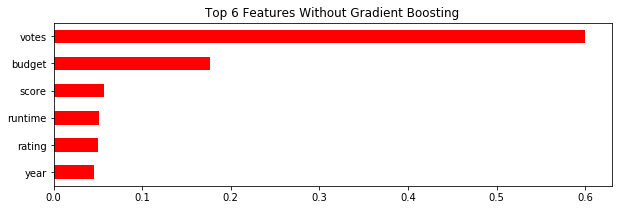

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 6
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features Without Gradient Boosting')
importances.sort_values()[-n:].plot.barh(color='red');

In [0]:
from xgboost import XGBRegressor

# get rid of the warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

gbpipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gbpipeline.fit(X_train, y_train)
y_pred = gbpipeline.predict(X_val)

# MAE
from sklearn.metrics import mean_absolute_error
y_pred = gbpipeline.predict(X_val)
print(f'MAE: ${mean_absolute_error(y_val, y_pred):,.0f}')

MAE: $21,285,172


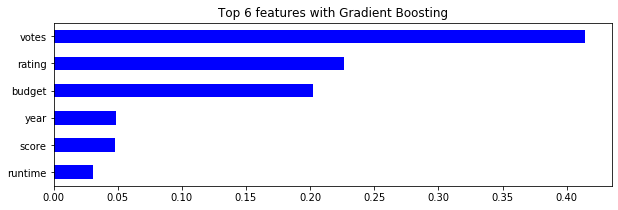

In [0]:
# Get feature importances
rf = gbpipeline.named_steps['xgbregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 6
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features with Gradient Boosting')
importances.sort_values()[-n:].plot.barh(color='blue');

